In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torch import optim, nn
import numpy as np

# O Dataset

Nesse notebook será explorado o dataset [*Pistachio types*](https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection)

Nele diferentes medidas foram retiradas de pistaches de duas espécies diferentes. Cada entrada representa um pistache e descreve o mesmo usando 16 valores além de um campo definido a qual espécie ele pertence. A imagem abaixo exemplifica algumas das medidas retiradas dos pistaches.

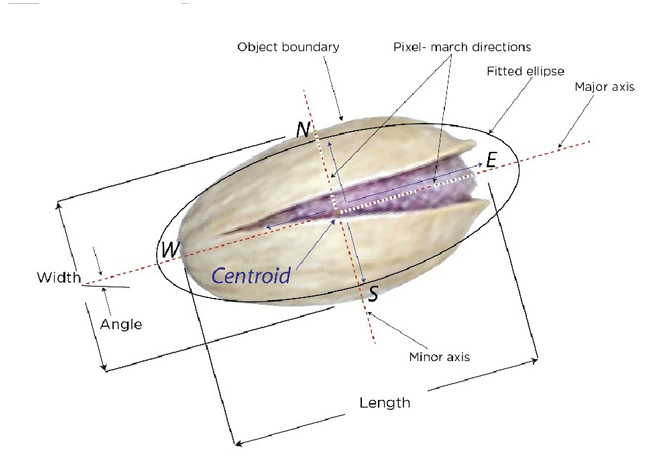


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/pistache/pistachio.csv")
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [ ]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


In [ ]:
c=df.drop(["Class"], axis= 1)
c

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532


In [ ]:
torch.tensor(c.iloc[0])

tensor([7.3107e+04, 1.1618e+03, 4.4241e+02, 2.1773e+02, 8.7050e-01, 3.0509e+02,
        9.4240e-01, 7.7579e+04, 7.7100e-01, 2.0319e+00, 6.8060e-01, 6.8960e-01,
        6.1000e-03, 3.0000e-03, 4.7560e-01, 9.6640e-01], dtype=torch.float64)

In [ ]:
info = df.drop(["Class"], axis= 1)
info

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532


# A rede neural

Como classifidor será utilizado uma rede neural na seguinte topologia

* Linear (16 x 32)
* ReLU
* Linear (32 x 32)
* ReLU
* Linear (32 x 2)
* Softmax

Onde ela receberá um tensor com os 16 valores encontrados no banco de dados normalizados. E retornará a confiança de confiança de estar em cada uma das classes



In [ ]:
class Net(nn.Module):

    def __init__(self, input_size, output_size, hidden_size=32):
      super().__init__()

      self.seq = nn.Sequential(
                               nn.Linear(input_size, hidden_size),
                               nn.ReLU(),
                               nn.Linear(hidden_size, hidden_size),
                               nn.ReLU(),
                               nn.Linear(hidden_size, output_size)
                              )

      self.softmax = nn.Softmax()

    def forward(self, X):

      # X = X.view(X.size(0), -1)
      X = self.seq(X)
      return self.softmax(X)

In [ ]:
args = {
    'batch_size': 32,
    'num_workers': 2,
    'lr': 1e-6,
    'weight_decay': 5e-5,
    'num_epochs': 400,
    'num_inputs': 16,
    'num_outputs': 2
}

if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

cpu


In [ ]:
net = Net(args['num_inputs'], args['num_outputs'])
net = net.to(args["device"])

In [ ]:
class Pistachi(Dataset):
  def __init__(self, path="/content/drive/MyDrive/pistache/pistachio.csv"):

    df = pd.read_csv(path)
    self.class_map = {"Kirmizi_Pistachio" : 0, "Siit_Pistachio": 1}

    x = df.drop(["Class"], axis= 1)
    for column in x.columns:
      x[column] = (x[column] - x[column].mean()) / x[column].std()

    x = x.values
    y = df["Class"].apply(lambda x: self.class_map[x])

    self.x = torch.tensor(x, dtype=torch.float)
    self.y = torch.tensor(y)

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [ ]:
from torchvision import transforms

all_Set = Pistachi()
train_set, test_set = random_split(all_Set, [.8, .2], generator=torch.Generator().manual_seed(42))


train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

len(train_loader), len(test_loader)

(43, 11)

In [ ]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [ ]:
def train_cicle(loader, net):

  cicle_loss = []
  net.train() # Seta a rede no modo treino

  for batch in loader:
    dado, rotulo = batch

    # Cast na GPU
    dado   = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])

    # Forward
    pred = net(dado)
    loss = criterion(pred, rotulo)
    cicle_loss.append(loss.cpu().data)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  cicle_loss = np.asarray(cicle_loss)
  return cicle_loss.mean(), cicle_loss.std()

In [ ]:
def test_cicle(loader, net):

  cicle_loss = []
  correct = 0
  total = 0
  net.eval() # Seta a rede no modo de validação

  with torch.no_grad():
    for batch in loader:
      dado, rotulo = batch

      # Cast na GPU
      dado   = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Forward
      pred = net(dado)
      loss = criterion(pred, rotulo)
      cicle_loss.append(loss.cpu().data)

      _, predicted = torch.max(pred.data, 1)
      total += rotulo.size(0)
      correct += (predicted == rotulo).sum().item()

  cicle_loss = np.asarray(cicle_loss)
  return cicle_loss.mean(), cicle_loss.std(), correct/total


# Diferenças na Mudança de Hiperparâmetros

In [ ]:
all_data = []

In [ ]:
import time

train_losses, test_losses, acurracy = [], [], []
for epoch in range(args['num_epochs']):

  print('------------------------')
  print(f'epoch {epoch}')

  # Train
  begin = time.time()
  train = train_cicle(train_loader, net)
  end = time.time()

  print(f'train : loss {train[0]:.4f} +\- {train[1]:.4f}, time = {end-begin:.2f}')

  # Validate
  begin = time.time()
  test = test_cicle(test_loader, net)
  end = time.time()

  print(f'test : loss {test[0]:.4f} +\- {test[1]:.4f}, time = {end-begin:.2f}')
  print(f'Acuracy: {test[2]}')

  train_losses.append(train[0])
  test_losses.append(test[0])
  acurracy.append(test[2])

all_data.append((train_losses, test_losses, acurracy))

------------------------
epoch 0


<ipython-input-8-1dbec7509043>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(X)


train : loss 0.7011 +\- 0.0064, time = 0.40
test : loss 0.6991 +\- 0.0063, time = 0.17
Acuracy: 0.39941690962099125
------------------------
epoch 1
train : loss 0.7010 +\- 0.0066, time = 0.57
test : loss 0.6985 +\- 0.0054, time = 0.21
Acuracy: 0.39941690962099125
------------------------
epoch 2
train : loss 0.7009 +\- 0.0060, time = 0.47
test : loss 0.6987 +\- 0.0045, time = 0.20
Acuracy: 0.39941690962099125
------------------------
epoch 3
train : loss 0.7008 +\- 0.0066, time = 0.44
test : loss 0.6987 +\- 0.0036, time = 0.26
Acuracy: 0.39941690962099125
------------------------
epoch 4
train : loss 0.7007 +\- 0.0068, time = 0.87
test : loss 0.6986 +\- 0.0057, time = 0.31
Acuracy: 0.39941690962099125
------------------------
epoch 5
train : loss 0.7007 +\- 0.0050, time = 0.81
test : loss 0.6985 +\- 0.0054, time = 0.38
Acuracy: 0.39941690962099125
------------------------
epoch 6
train : loss 0.7006 +\- 0.0065, time = 0.36
test : loss 0.6983 +\- 0.0051, time = 0.23
Acuracy: 0.39941690

[]

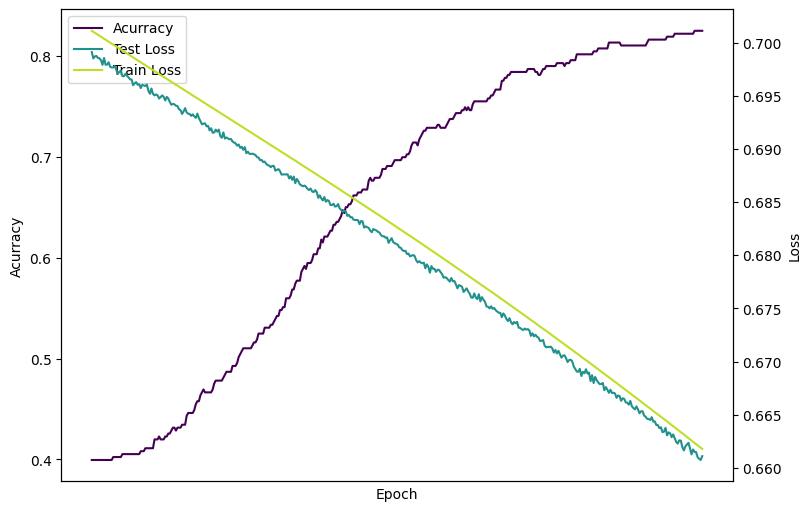

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
# (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
# .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)

ax2 = host.twinx()

host.set_xlabel("Epoch")
host.set_ylabel("Acurracy")
ax2.set_ylabel("Loss")

color1, color2, color3 = plt.cm.viridis([0, .5, .9])

p1 = host.plot(acurracy, color=color1, label="Acurracy")
p2 = ax2.plot(test_losses, color=color2, label="Test Loss")
p3 = ax2.plot(train_losses, color=color3, label="Train Loss")

host.legend(handles=p1+p2+p3, loc='best')

# no x-ticks
host.xaxis.set_ticks([])

In [ ]:
args['lr'] = 1e-5

net = Net(args['num_inputs'], args['num_outputs'])
net = net.to(args["device"])

criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [ ]:
import time

train_losses, test_losses, acurracy = [], [], []
for epoch in range(args['num_epochs']):

  print('------------------------')
  print(f'epoch {epoch}')

  # Train
  begin = time.time()
  train = train_cicle(train_loader, net)
  end = time.time()

  print(f'train : loss {train[0]:.4f} +\- {train[1]:.4f}, time = {end-begin:.2f}')

  # Validate
  begin = time.time()
  test = test_cicle(test_loader, net)
  end = time.time()

  print(f'test : loss {test[0]:.4f} +\- {test[1]:.4f}, time = {end-begin:.2f}')
  print(f'Acuracy: {test[2]}')

  train_losses.append(train[0])
  test_losses.append(test[0])
  acurracy.append(test[2])

all_data.append((train_losses, test_losses, acurracy))

[]

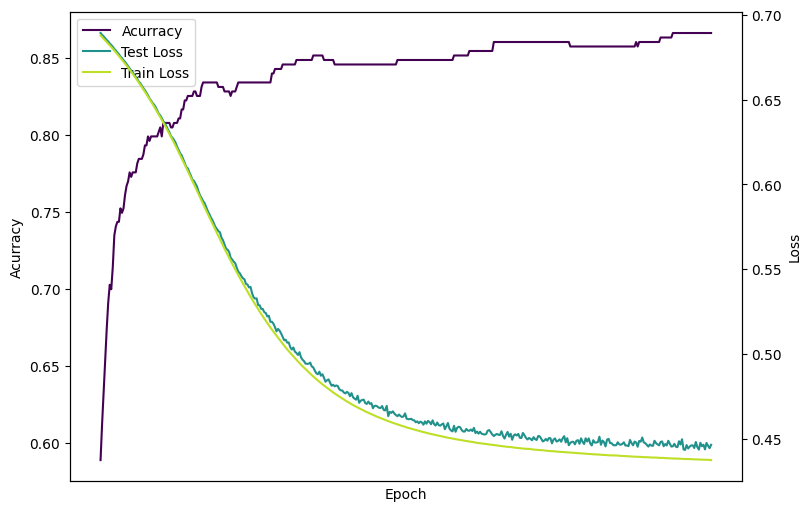

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
# (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
# .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)

ax2 = host.twinx()

host.set_xlabel("Epoch")
host.set_ylabel("Acurracy")
ax2.set_ylabel("Loss")

color1, color2, color3 = plt.cm.viridis([0, .5, .9])

p1 = host.plot(acurracy, color=color1, label="Acurracy")
p2 = ax2.plot(test_losses, color=color2, label="Test Loss")
p3 = ax2.plot(train_losses, color=color3, label="Train Loss")

host.legend(handles=p1+p2+p3, loc='best')

# no x-ticks
host.xaxis.set_ticks([])

In [ ]:
args['lr'] = 1e-1

net = Net(args['num_inputs'], args['num_outputs'])
net = net.to(args["device"])

criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [ ]:
import time

train_losses, test_losses, acurracy = [], [], []
for epoch in range(args['num_epochs']):

  print('------------------------')
  print(f'epoch {epoch}')

  # Train
  begin = time.time()
  train = train_cicle(train_loader, net)
  end = time.time()

  print(f'train : loss {train[0]:.4f} +\- {train[1]:.4f}, time = {end-begin:.2f}')

  # Validate
  begin = time.time()
  test = test_cicle(test_loader, net)
  end = time.time()

  print(f'test : loss {test[0]:.4f} +\- {test[1]:.4f}, time = {end-begin:.2f}')
  print(f'Acuracy: {test[2]}')

  train_losses.append(train[0])
  test_losses.append(test[0])
  acurracy.append(test[2])

all_data.append((train_losses, test_losses, acurracy))

[]

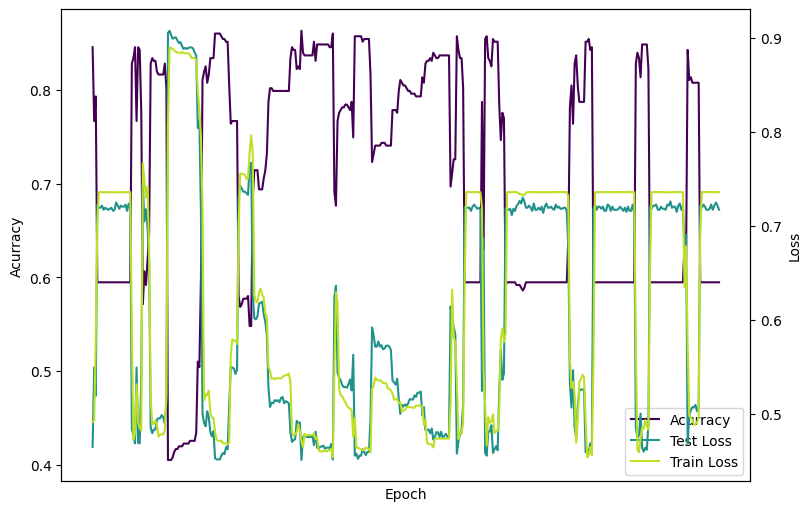

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
# (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
# .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)

ax2 = host.twinx()

host.set_xlabel("Epoch")
host.set_ylabel("Acurracy")
ax2.set_ylabel("Loss")

color1, color2, color3 = plt.cm.viridis([0, .5, .9])

p1 = host.plot(acurracy, color=color1, label="Acurracy")
p2 = ax2.plot(test_losses, color=color2, label="Test Loss")
p3 = ax2.plot(train_losses, color=color3, label="Train Loss")

host.legend(handles=p1+p2+p3, loc='best')

# no x-ticks
host.xaxis.set_ticks([])

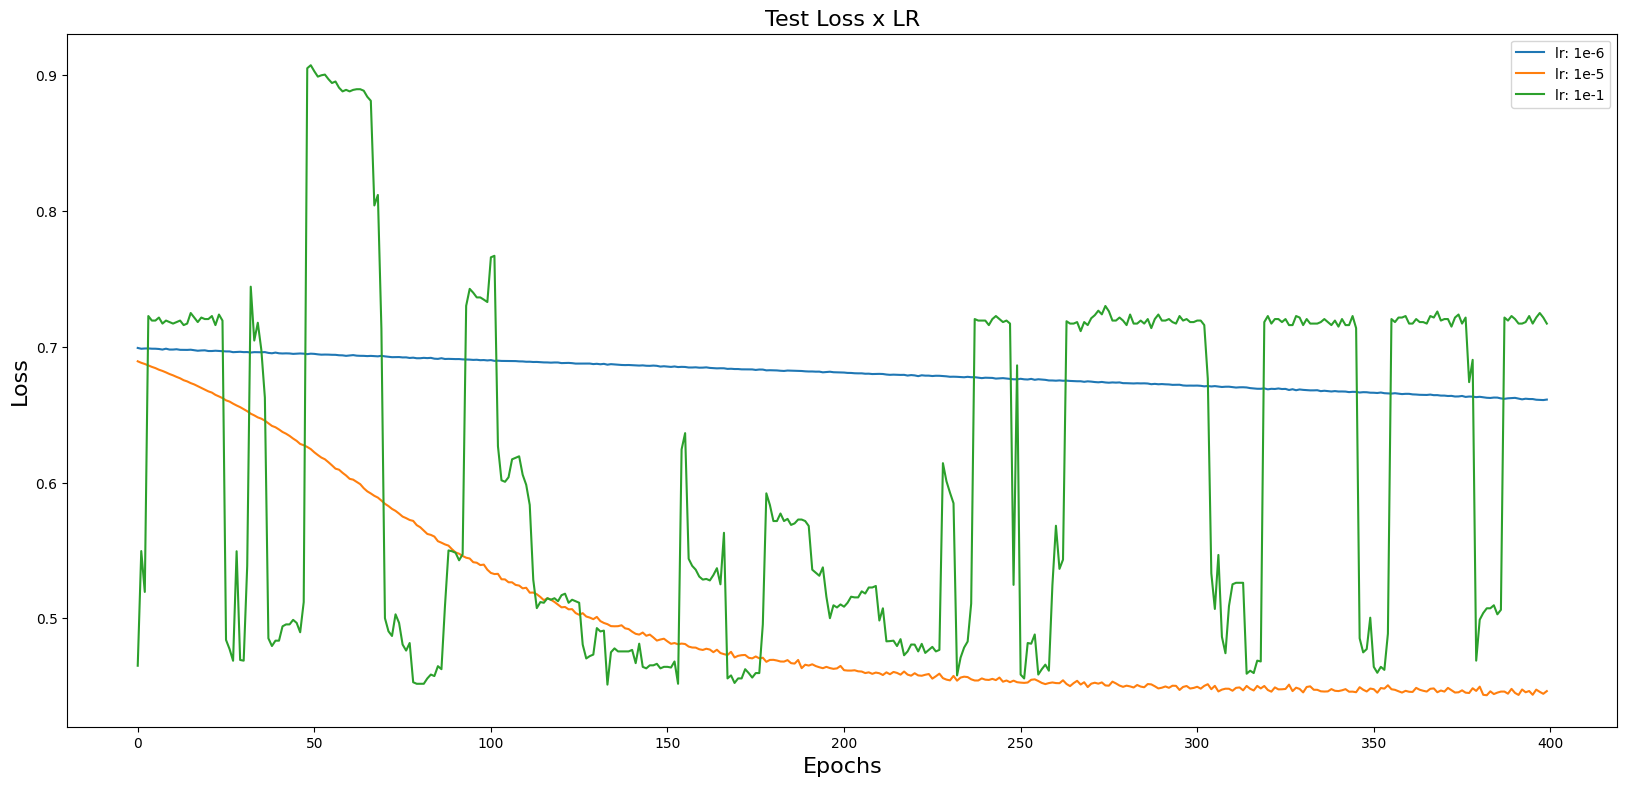

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 9))
for i, j in zip(all_data, ['1e-6', '1e-5', '1e-1']):
  plt.plot(i[1], label=f"lr: {j}")
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Test Loss x LR', fontsize=16)
plt.legend()
plt.show()

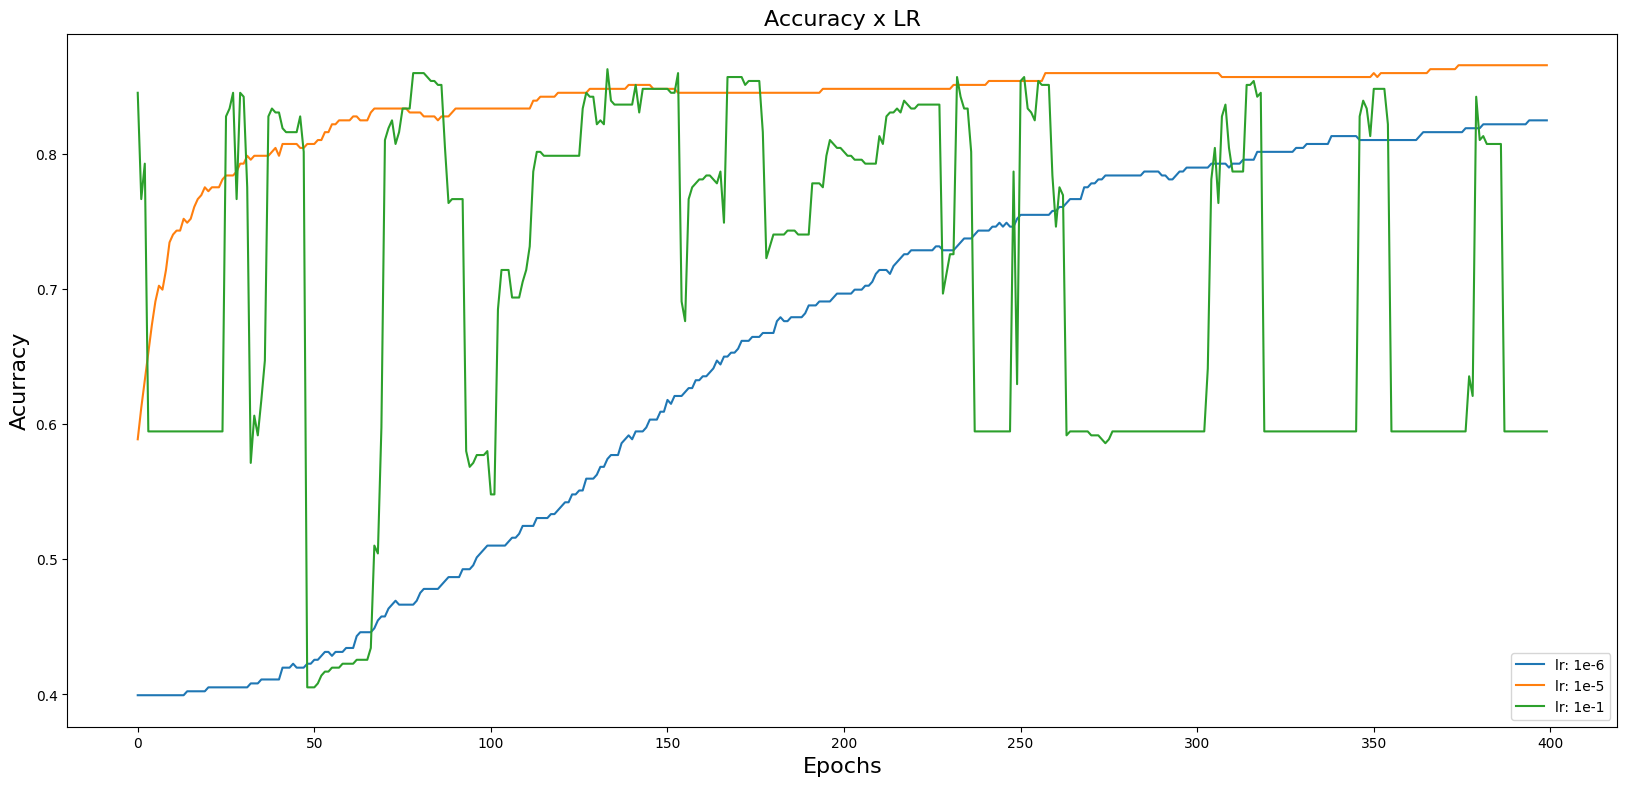

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 9))
for i, j in zip(all_data, ['1e-6', '1e-5', '1e-1']):
  plt.plot(i[2], label=f"lr: {j}")
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Acurracy', fontsize=16)
plt.title('Accuracy x LR', fontsize=16)
plt.legend()
plt.show()